In [2]:
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import keras
from keras.datasets import mnist 
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import backend as k

In [3]:
batch_size = 250
num_classes = 10
epochs = 15

In [4]:
img_rows, img_cols = 28,28

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


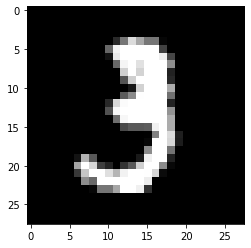

In [7]:
sample = 10
image = x_train[sample]
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [8]:
x_train[0].shape, y_test[0]

((28, 28), 7)

In [9]:
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


60000 train samples
10000 test samples


In [10]:
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [12]:
model = Sequential()

model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 32)                16416     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 418,666
Trainable params: 418,666
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss = 'categorical_crossentropy',
              optimizer=SGD(), # adam, .... gradient descent
              metrics=['accuracy'])

In [22]:
H = model.fit(x_train, y_train,
              batch_size = batch_size,
              epochs = epochs,
              verbose = 1,
              validation_data = (x_test, y_test))

Epoch 1/15
240/240 [==============================] - 4s 14ms/step - loss: 1.5546 - accuracy: 0.5836 - val_loss: 0.9220 - val_accuracy: 0.8061
Epoch 2/15
240/240 [==============================] - 3s 13ms/step - loss: 0.7179 - accuracy: 0.8322 - val_loss: 0.5529 - val_accuracy: 0.8677
Epoch 3/15
240/240 [==============================] - 3s 13ms/step - loss: 0.5105 - accuracy: 0.8697 - val_loss: 0.4386 - val_accuracy: 0.8884
Epoch 4/15
240/240 [==============================] - 3s 13ms/step - loss: 0.4273 - accuracy: 0.8868 - val_loss: 0.3801 - val_accuracy: 0.9005
Epoch 5/15
240/240 [==============================] - 3s 13ms/step - loss: 0.3805 - accuracy: 0.8978 - val_loss: 0.3472 - val_accuracy: 0.9087
Epoch 6/15
240/240 [==============================] - 3s 13ms/step - loss: 0.3497 - accuracy: 0.9045 - val_loss: 0.3206 - val_accuracy: 0.9125
Epoch 7/15
240/240 [==============================] - 3s 13ms/step - loss: 0.3273 - accuracy: 0.9099 - val_loss: 0.3029 - val_accuracy: 0.9171

In [24]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.22921977937221527
Test accuracy:  0.9373999834060669


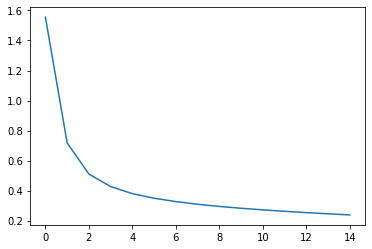

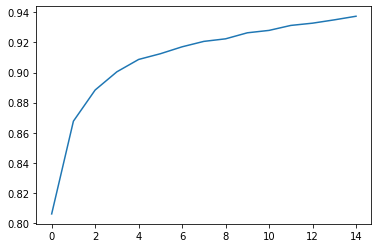

In [25]:
plt.plot(H.history['loss'])
plt.show()
plt.plot(H.history['val_accuracy'])
plt.show()